In [193]:
import yt
import netCDF4 as nc
import pyart
import matplotlib.pyplot as plt
import pygrib
import pandas as pd
import xarray as xr
import cfgrib
import ipywidgets
import numpy as np

In [29]:
ice = nc.Dataset('data/icec.sfc.gauss.1998.nc')

In [30]:
ice

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.0
    title: Daily NCEP/DOE Reanalysis 2
    comments: Data is from 
NCEP/DOE AMIP-II Reanalysis (Reanalysis-2)
(4x/day).  Data interpolated from model (sigma) surfaces to gaussian grid.
    platform: Model
    source: NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Model
    institution: National Centers for Environmental Prediction
    dataset_title: NCEP-DOE AMIP-II Reanalysis
    References: https://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis2.html
    source_url: http://www.cpc.ncep.noaa.gov/products/wesley/reanalysis2/
    history: created 2002/03 by RHS (netCDF2.3)
Converted to chunked, deflated non-packed NetCDF4 2020/05
    dimensions(sizes): lon(192), lat(94), time(365), nbnds(2)
    variables(dimensions): float32 lat(lat), float32 lon(lon), float64 time_bnds(time, nbnds), float64 time(time), float32 icec(time, lat, lon)
    groups: 

In [9]:
seismic = pd.read_csv('3D_seismic_velocity_model.csv')

In [28]:
seismic

,x (m),y (m),z (m),Vp (km/s),Vp Quality,Vs (km/s),Vs Quality
0,801.0,-1326.0,87.0,5.9,0,3.5,0
1,801.0,-1326.0,88.0,5.9,0,3.5,0
2,801.0,-1326.0,89.0,5.9,0,3.5,0
3,801.0,-1326.0,90.0,5.9,0,3.5,0
4,801.0,-1326.0,91.0,5.9,0,3.5,0
...,...,...,...,...,...,...,...
57299,838.0,-1275.0,111.0,5.9,0,3.5,0
57300,838.0,-1275.0,112.0,5.9,0,3.5,0
57301,838.0,-1275.0,113.0,5.9,0,3.5,0
57302,838.0,-1275.0,114.0,5.9,0,3.5,0


In [1]:
sonar = pd.read_csv('data/SaKe2013-D20130523-T080854_to_SaKe2013-D20130523-T085643.csv')

NameError: name 'pd' is not defined

In [43]:
sonar.reset_index()

/Users/tzacks2/.conda/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """Entry point for launching an IPython kernel.


,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,...,Ping_date,Ping_time,Ping_milliseconds,Latitude,Longitude,Depth_start,Depth_stop,Range_start,Range_stop,Sample_count
0,0,0.000000,23169.606000,2013-05-23,08:08:54,287.0,999.000000,999.000000,0.75,750.75,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.000000,-9.990000e+02,-9.900000e+37
1,1,0.001448,23169.611615,2013-05-23,08:08:55,802.0,47.038269,-124.846214,0.75,750.75,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.000000,-9.990000e+02,-9.900000e+37
2,2,0.007089,23169.617087,2013-05-23,08:08:57,302.0,47.038176,-124.846193,0.00,750.00,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.000000,-9.990000e+02,-9.990000e+02
3,3,0.012939,23169.623055,2013-05-23,08:08:58,802.0,47.038080,-124.846168,-0.75,749.25,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.000000,-9.990000e+02,-9.990000e+02
4,4,0.019105,23169.628933,2013-05-23,08:09:00,302.0,47.037980,-124.846135,-0.75,749.25,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.000000,-9.900000e+37,-9.900000e+37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2543,2543,14.305032,23183.782752,2013-05-23,09:12:32,753.0,46.803755,-124.787799,0.75,750.75,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.000000,-9.990000e+02,-9.900000e+37
2544,2544,14.310453,23183.788060,2013-05-23,09:12:34,253.0,46.803667,-124.787772,-0.75,749.25,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.000000,-9.990000e+02,-9.990000e+02
2545,2545,14.316294,23183.793965,2013-05-23,09:12:35,753.0,46.803572,-124.787741,-0.75,749.25,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.000000,-9.990000e+02,-9.900000e+37
2546,2546,14.322445,23183.800183,2013-05-23,09:12:37,253.0,46.803472,-124.787704,-0.75,749.25,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.000000,-9.990000e+02,-9.900000e+37


In [67]:
cols = sonar.columns
columns = []
for i in cols:
    i = i.strip(' ')
    columns.append(i)
columns
sonar.columns = columns
sonar.columns
sonar = sonar.reset_index()

/Users/tzacks2/.conda/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if __name__ == '__main__':


In [82]:
sonar.level_96

0      -999.000000
1       -77.272794
2       -78.221570
3      -999.000000
4       -78.891272
           ...    
2543    -76.217384
2544    -69.309698
2545    -71.436196
2546    -74.624618
2547    -73.332722
Name: level_96, Length: 2548, dtype: float64

In [80]:
sonar.Ping_index

0      -999.000000
1      -999.000000
2      -999.000000
3      -999.000000
4      -999.000000
           ...    
2543   -999.000000
2544   -999.000000
2545   -999.000000
2546   -999.000000
2547     -2.517943
Name: Ping_index, Length: 2548, dtype: float64

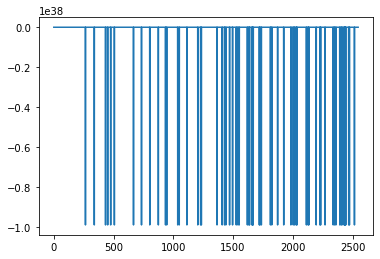

In [81]:
plt.plot(sonar.Ping_index)

In [18]:
import pyspark as spark

In [26]:
ship = pd.read_parquet('data/ship_points.gparq')

In [32]:
ship

,location_time,rawfilename,geometry
0,2017-06-15 19:02:15.445,Summer2017-D20170615-T190214.raw,b'\x01\x01\x00\x00\x00k3;x\x13\x03_\xc0i\xeb\x...
1,2017-06-15 19:02:15.603,Summer2017-D20170615-T190214.raw,b'\x01\x01\x00\x00\x00P\x8d\x97n\x12\x03_\xc0\...
2,2017-06-15 19:02:16.445,Summer2017-D20170615-T190214.raw,b'\x01\x01\x00\x00\x00k3;x\x13\x03_\xc0i\xeb\x...
3,2017-06-15 19:02:17.443,Summer2017-D20170615-T190214.raw,b'\x01\x01\x00\x00\x00k3;x\x13\x03_\xc0i\xeb\x...
4,2017-06-15 19:02:17.601,Summer2017-D20170615-T190214.raw,b'\x01\x01\x00\x00\x00P\x8d\x97n\x12\x03_\xc0\...
...,...,...,...
7700023,2017-06-15 00:29:05.399,Winter2017-D20170615-T002629.raw,b'\x01\x01\x00\x00\x00P\x8d\x97n\x12\x03_\xc0\...
7700024,2017-06-15 00:29:06.245,Winter2017-D20170615-T002629.raw,b'\x01\x01\x00\x00\x00k3;x\x13\x03_\xc04\xaa\x...
7700025,2017-06-15 00:29:07.243,Winter2017-D20170615-T002629.raw,b'\x01\x01\x00\x00\x00k3;x\x13\x03_\xc04\xaa\x...
7700026,2017-06-15 00:29:07.401,Winter2017-D20170615-T002629.raw,b'\x01\x01\x00\x00\x00P\x8d\x97n\x12\x03_\xc0\...


In [85]:
icec = nc.Dataset('data/icec.sfc.gauss.1998.nc')

In [86]:
icec

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.0
    title: Daily NCEP/DOE Reanalysis 2
    comments: Data is from 
NCEP/DOE AMIP-II Reanalysis (Reanalysis-2)
(4x/day).  Data interpolated from model (sigma) surfaces to gaussian grid.
    platform: Model
    source: NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Model
    institution: National Centers for Environmental Prediction
    dataset_title: NCEP-DOE AMIP-II Reanalysis
    References: https://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis2.html
    source_url: http://www.cpc.ncep.noaa.gov/products/wesley/reanalysis2/
    history: created 2002/03 by RHS (netCDF2.3)
Converted to chunked, deflated non-packed NetCDF4 2020/05
    dimensions(sizes): lon(192), lat(94), time(365), nbnds(2)
    variables(dimensions): float32 lat(lat), float32 lon(lon), float64 time_bnds(time, nbnds), float64 time(time), float32 icec(time, lat, lon)
    groups: 

In [87]:
icec.variables

{'lat': <class 'netCDF4._netCDF4.Variable'>
 float32 lat(lat)
     units: degrees_north
     actual_range: [ 88.542 -88.542]
     long_name: Latitude
     standard_name: latitude
     axis: Y
     coordinate_defines: point
 unlimited dimensions: 
 current shape = (94,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lon': <class 'netCDF4._netCDF4.Variable'>
 float32 lon(lon)
     units: degrees_east
     long_name: Longitude
     actual_range: [  0.    358.125]
     standard_name: longitude
     axis: X
     coordinate_defines: point
 unlimited dimensions: 
 current shape = (192,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'time_bnds': <class 'netCDF4._netCDF4.Variable'>
 float64 time_bnds(time, nbnds)
     long_name: Time Boundaries
 unlimited dimensions: time
 current shape = (365, 2)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'time': <class 'netCDF4._netCDF4.Variable'>
 float64 time(time)
     units: hours since 1800-1-1 00:

In [89]:
icec.variables['icec']

<class 'netCDF4._netCDF4.Variable'>
float32 icec(time, lat, lon)
    long_name: Daily Forecast of Ice Concentration at Surface
    units:  
    precision: 1
    least_significant_digit: 0
    GRIB_id: 91
    GRIB_name: ICE C
    var_desc: Ice Concentration
    dataset: NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Daily Averages
    level_desc: Surface
    statistic: Mean
    parent_stat: Individual Obs
    standard_name: sea_ice_area_fraction
    cell_methods: time: mean (of 4 6-hourly values in one day)
    missing_value: -9.96921e+36
    actual_range: [0.09985352 0.89990234]
    valid_range: [0. 1.]
unlimited dimensions: time
current shape = (365, 94, 192)
filling on, default _FillValue of 9.969209968386869e+36 used

In [125]:
icec.variables['icec'][:]

masked_array(
  data=[[[0.89990234, 0.89990234, 0.89990234, ..., 0.89990234,
          0.89990234, 0.89990234],
         [0.89990234, 0.89990234, 0.89990234, ..., 0.89990234,
          0.89990234, 0.89990234],
         [0.89990234, 0.89990234, 0.89990234, ..., 0.89990234,
          0.89990234, 0.89990234],
         ...,
         [0.09985352, 0.09985352, 0.09985352, ..., 0.09985352,
          0.09985352, 0.09985352],
         [0.09985352, 0.09985352, 0.09985352, ..., 0.09985352,
          0.09985352, 0.09985352],
         [0.09985352, 0.09985352, 0.09985352, ..., 0.09985352,
          0.09985352, 0.09985352]],

        [[0.89990234, 0.89990234, 0.89990234, ..., 0.89990234,
          0.89990234, 0.89990234],
         [0.89990234, 0.89990234, 0.89990234, ..., 0.89990234,
          0.89990234, 0.89990234],
         [0.89990234, 0.89990234, 0.89990234, ..., 0.89990234,
          0.89990234, 0.89990234],
         ...,
         [0.09985352, 0.09985352, 0.09985352, ..., 0.09985352,
          0

In [164]:
play = ipywidgets.Play(
    value=0,
    min=0,
    max=364,
    step=1,
    interval=250,
    description="Press play",
    disabled=True
)

In [166]:
plt.rcParams['figure.dpi'] = 150
@ipywidgets.interact(t = (0,364,1),play = play)
def make_plot(t):
    plt.clf
    plt.pcolormesh(icec.variables['icec'][t])

interactive(children=(IntSlider(value=182, description='t', max=364), Output()), _dom_classes=('widget-interac…

In [167]:
icec2 = nc.Dataset('data/icec.mon.mean.nc')

In [168]:
icec2

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    title: created 05/2014 from data provided by JRA
    history: Created 12/2012 from data obtained from JRA by ESRL/PSD
    platform: Analyses
    citation: Hirahara, S., Ishii, M., and Y. Fukuda,2014: Centennial-scale sea surface temperature analysis and its uncertainty. J of Climate, 27, 57-75. http://journals.ametsoc.org/doi/pdf/10.1175/JCLI-D-12-00837.1
    institution: NOAA ESRL/PSD
    Conventions: CF-1.2
    dataset_title: COBE-SST2 Sea Surface Temperature and Ice
    original_source: https://climate.mri-jma.go.jp/pub/ocean/cobe-sst2/
    References: https://www.psl.noaa.gov/data/gridded/cobe2.html
    dimensions(sizes): lon(360), lat(180), time(2040)
    variables(dimensions): float32 lat(lat), float32 lon(lon), float64 time(time), float32 icec(time, lat, lon)
    groups: 

In [195]:
plt.rcParams['figure.dpi'] = 150
@ipywidgets.interact(t = (0,364,1),play = play)
def make_plot(t):
    plt.clf
    plt.imshow(icec2.variables['icec'][t])

interactive(children=(IntSlider(value=182, description='t', max=364), Output()), _dom_classes=('widget-interac…

In [2]:
earthquakes = pd.read_csv('data/all_month.csv')
earthquakes

NameError: name 'pd' is not defined

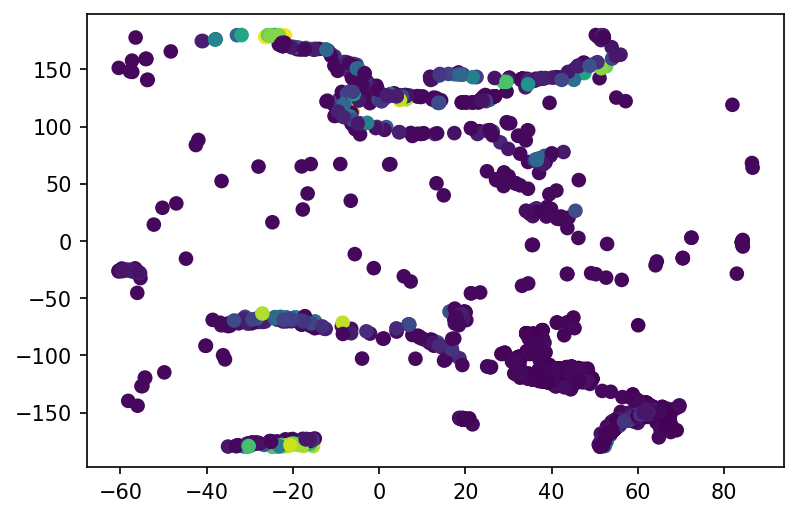

In [189]:
plt.scatter(x=earthquakes['latitude'],y = earthquakes['longitude'], c = earthquakes['depth'])

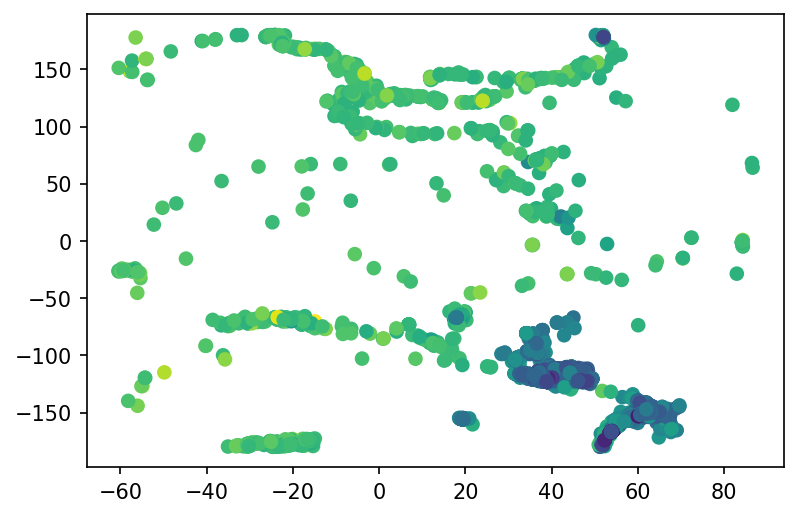

In [190]:
plt.scatter(x=earthquakes['latitude'],y = earthquakes['longitude'], c = earthquakes['mag'])

In [177]:
help(plt.pcolormesh)

Help on function pcolormesh in module matplotlib.pyplot:

pcolormesh(*args, alpha=None, norm=None, cmap=None, vmin=None, vmax=None, shading='flat', antialiased=False, data=None, **kwargs)
    Create a pseudocolor plot with a non-regular rectangular grid.
    
    Call signature::
    
        pcolor([X, Y,] C, **kwargs)
    
    *X* and *Y* can be used to specify the corners of the quadrilaterals.
    
    .. note::
    
       `~Axes.pcolormesh` is similar to `~Axes.pcolor`. It's much faster
       and preferred in most cases. For a detailed discussion on the
       differences see :ref:`Differences between pcolor() and pcolormesh()
       <differences-pcolor-pcolormesh>`.
    
    Parameters
    ----------
    C : array-like
        A scalar 2-D array. The values will be color-mapped.
    
    X, Y : array-like, optional
        The coordinates of the quadrilateral corners. The quadrilateral
        for ``C[i, j]`` has corners at::
    
            (X[i+1, j], Y[i+1, j])           (X

In [194]:
np.array(earthquakes)

array([['2022-06-07T21:31:17.385Z', 38.2732, -118.5854, ..., 'automatic',
        'nn', 'nn'],
       ['2022-06-07T21:21:19.200Z', 36.0751667, -117.8746667, ...,
        'automatic', 'ci', 'ci'],
       ['2022-06-07T21:08:33.500Z', 36.4355011, -120.4871674, ...,
        'automatic', 'nc', 'nc'],
       ...,
       ['2022-05-08T21:53:22.555Z', 61.9863, -147.1556, ..., 'automatic',
        'ak', 'ak'],
       ['2022-05-08T21:51:40.332Z', 1.8243, 127.1791, ..., 'reviewed',
        'us', 'us'],
       ['2022-05-08T21:51:21.350Z', 53.8651666666667, -166.855833333333,
        ..., 'reviewed', 'av', 'av']], dtype=object)